In [9]:
# Import necessary libraries
import pandas as pd

# Upload the files
from google.colab import files
uploaded = files.upload()

# Load the datasets
city_day = pd.read_csv('city_day.csv')
station_day = pd.read_csv('station_day.csv')

# Preprocessing Function
def preprocess_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df.ffill(inplace=True)  # Forward-fill missing values
    return df

# Apply preprocessing
city_day = preprocess_data(city_day)
station_day = preprocess_data(station_day)

# Check loaded data
print(city_day.head())


        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  Year  Month  Day  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015      1    1  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015      1    2  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015      1    3  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015      1    4  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015      1    5  


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to analyze AQI trends for a city
def city_analysis(city):
    city_data = city_day[city_day['City'] == city]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=city_data, x='Date', y='AQI')
    plt.title(f"AQI Trends in {city}")
    plt.xlabel("Date")
    plt.ylabel("AQI")
    plt.show()

# Interactive city selection
from ipywidgets import interact
interact(city_analysis, city=city_day['City'].unique())


interactive(children=(Dropdown(description='city', options=('Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'B…

<function __main__.city_analysis(city)>

interactive(children=(Dropdown(description='Select City:', options=('Ahmedabad', 'Aizawl', 'Amaravati', 'Amrit…

Mean Squared Error: 1744.440152961507
R2 Score: 0.8842867326166856


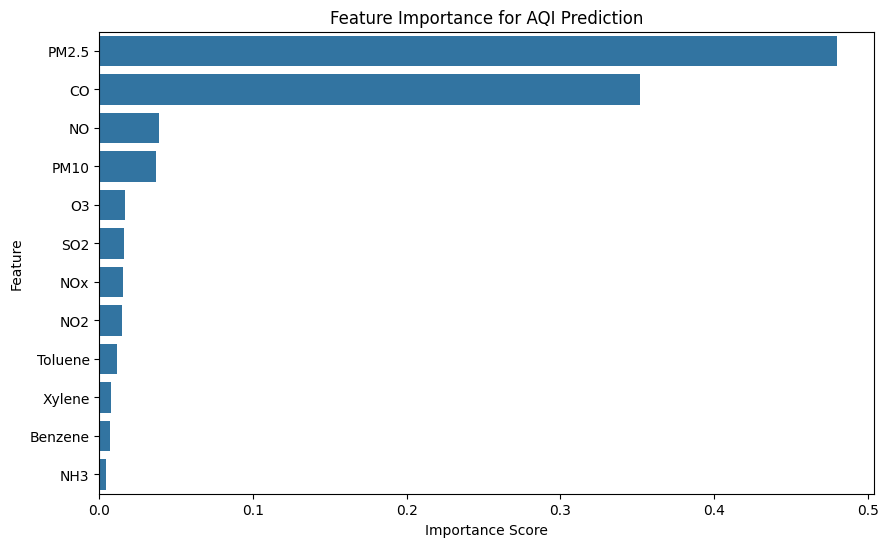

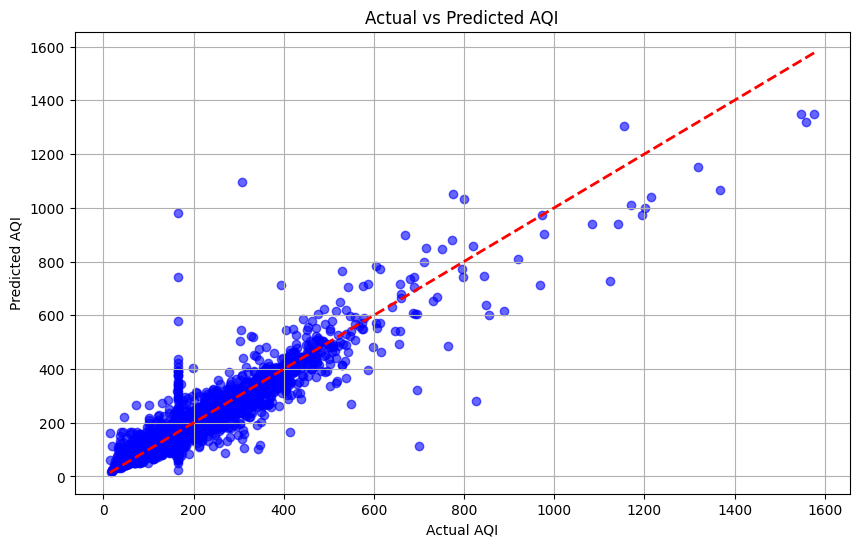

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, Dropdown

# Load the dataset
file_path = "city_day.csv"  # Ensure the file is in your working directory
city_day = pd.read_csv(file_path)

# Drop duplicates and reset the index
city_day = city_day.drop_duplicates().reset_index(drop=True)

# Fill missing values for numeric columns only
numeric_columns = city_day.select_dtypes(include=[np.number]).columns
city_day[numeric_columns] = city_day[numeric_columns].fillna(city_day[numeric_columns].mean())

# List of unique cities
cities = sorted(city_day['City'].unique())

# Function to plot AQI trends for the selected city
def plot_aqi_trend(city_name):
    city_sample = city_day[city_day['City'] == city_name]
    if city_sample.empty:
        print(f"No data available for {city_name}")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(city_sample['Date']), city_sample['AQI'], label='AQI', color="blue")
    plt.xlabel("Date")
    plt.ylabel("AQI")
    plt.title(f"AQI Trend over Time ({city_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive dropdown for city selection
city_selector = Dropdown(
    options=cities,
    value=cities[0],
    description='Select City:',
    style={'description_width': 'initial'}
)

# Display interactive plot
interact(plot_aqi_trend, city_name=city_selector)

# AQI Prediction
# Prepare the dataset for prediction
predict_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Drop rows with missing values in relevant columns
city_day = city_day.dropna(subset=predict_features + [target])

X = city_day[predict_features]
y = city_day[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=predict_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance for AQI Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Visualization of Predicted vs Actual AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import gradio as gr

# Load and preprocess the dataset
file_path = "city_day.csv"  # Ensure the file is in your working directory
city_day = pd.read_csv(file_path)

# Drop duplicates and reset the index
city_day = city_day.drop_duplicates().reset_index(drop=True)

# Fill missing values for numeric columns
numeric_columns = city_day.select_dtypes(include=[np.number]).columns
city_day[numeric_columns] = city_day[numeric_columns].fillna(city_day[numeric_columns].mean())

# Prepare the dataset for AQI prediction
predict_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Drop rows with missing values in relevant columns
city_day = city_day.dropna(subset=predict_features + [target])

X = city_day[predict_features]
y = city_day[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# AQI prediction function
def predict_aqi(city_name, **features):
    input_array = np.array([features[f] for f in predict_features]).reshape(1, -1)
    predicted_aqi = rf_model.predict(input_array)[0]

    # Plot AQI trend
    city_sample = city_day[city_day['City'] == city_name]
    if not city_sample.empty:
        plt.figure(figsize=(10, 5))
        plt.plot(pd.to_datetime(city_sample['Date']), city_sample['AQI'], label='AQI', color="blue")
        plt.xlabel("Date")
        plt.ylabel("AQI")
        plt.title(f"AQI Trend for {city_name}")
        plt.legend()
        plt.grid(True)
        plt.savefig("aqi_trend.png")
        plt.close()
        trend_image = "aqi_trend.png"
    else:
        trend_image = None

    return trend_image, f"Predicted AQI: {predicted_aqi:.2f}"

# Gradio UI components
cities = sorted(city_day['City'].unique())

# Create the interface
with gr.Blocks() as app:
    gr.Markdown("## AQI Prediction and Visualization")

    with gr.Row():
        city_dropdown = gr.Dropdown(choices=cities, label="Select City")

    with gr.Row():
        inputs = {}
        for feature in predict_features:
            inputs[feature] = gr.Number(label=feature)

    with gr.Row():
        predict_button = gr.Button("Predict AQI")

    with gr.Row():
        trend_plot = gr.Image(label="AQI Trend")
        prediction_text = gr.Textbox(label="Prediction Result")

    def handle_predict(city_name, *args):
        features_dict = {predict_features[i]: args[i] for i in range(len(args))}
        return predict_aqi(city_name, **features_dict)

    predict_button.click(
        handle_predict,
        inputs=[city_dropdown] + [inputs[f] for f in predict_features],
        outputs=[trend_plot, prediction_text]
    )

# Launch the Gradio app
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9ed56522f40bc1dfc7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
